# Effect of COVID-19 on prescribing of Dependence Forming Medicines and the associated health utilisation

Data for this research has been run on the TPP system which covers approximately 40% of all practices, with a total population of approximately ?? Jan-19, rising to approximately ?? Mar-23.

Population = patients registered, have not died and <=120 years of age.

Research population = patients registered, have not died, <=120 years of age, on a dependence forming medication and do not have cancer and do not have epilepsy.

#### Report 3 - focus on the demographics of the research population; d. focus on Region

In [239]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from textwrap import wrap
import matplotlib.dates as mdates
import matplotlib.axes as ax
import datetime
from tabulate import tabulate
from pandas.plotting import register_matplotlib_converters
from matplotlib import cm
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

# set the date format for plots
dtFmt = mdates.DateFormatter('%b-%Y')

# set month for covid reference line
covid = ("2022-04-01")

# set position for covid text
pos_text_covid = ("2022-03-01")

# set month for chart labels
pos_chart_labels = ("2022-10-01")

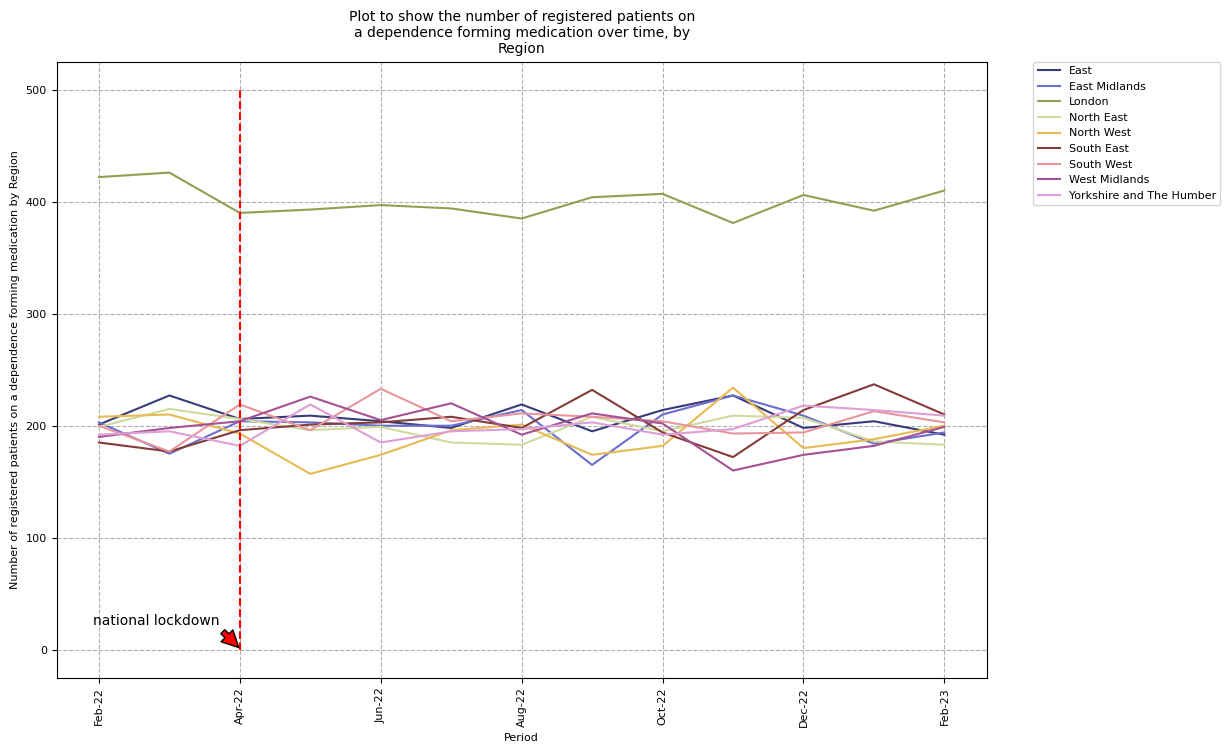

In [240]:
data_measure_dfm_medications_region_rate = pd.read_csv("../output/measure_dfm_medications_by_region_rate.csv", parse_dates=["date"])
data_measure_dfm_medications_region_rate = data_measure_dfm_medications_region_rate.loc[data_measure_dfm_medications_region_rate["region"] != "nan", :]
df_measure_dfm_medications_region_rate = pd.DataFrame.pivot(data_measure_dfm_medications_region_rate, index='date', columns='region', values='research_population')
df_measure_dfm_medications_region_rate.index = pd.to_datetime(df_measure_dfm_medications_region_rate.index).strftime('%b-%y')
ax = df_measure_dfm_medications_region_rate.plot(fontsize=8, figsize=(12,8), colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=500,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_plot.png", bbox_inches='tight', dpi=100)
plt.show()

In [241]:
print(tabulate(df_measure_dfm_medications_region_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_dfm_medications_region_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22     201              203       422           199           208           185           200              190                         192
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-23     192              194       410           183           200           210           203              199                         209


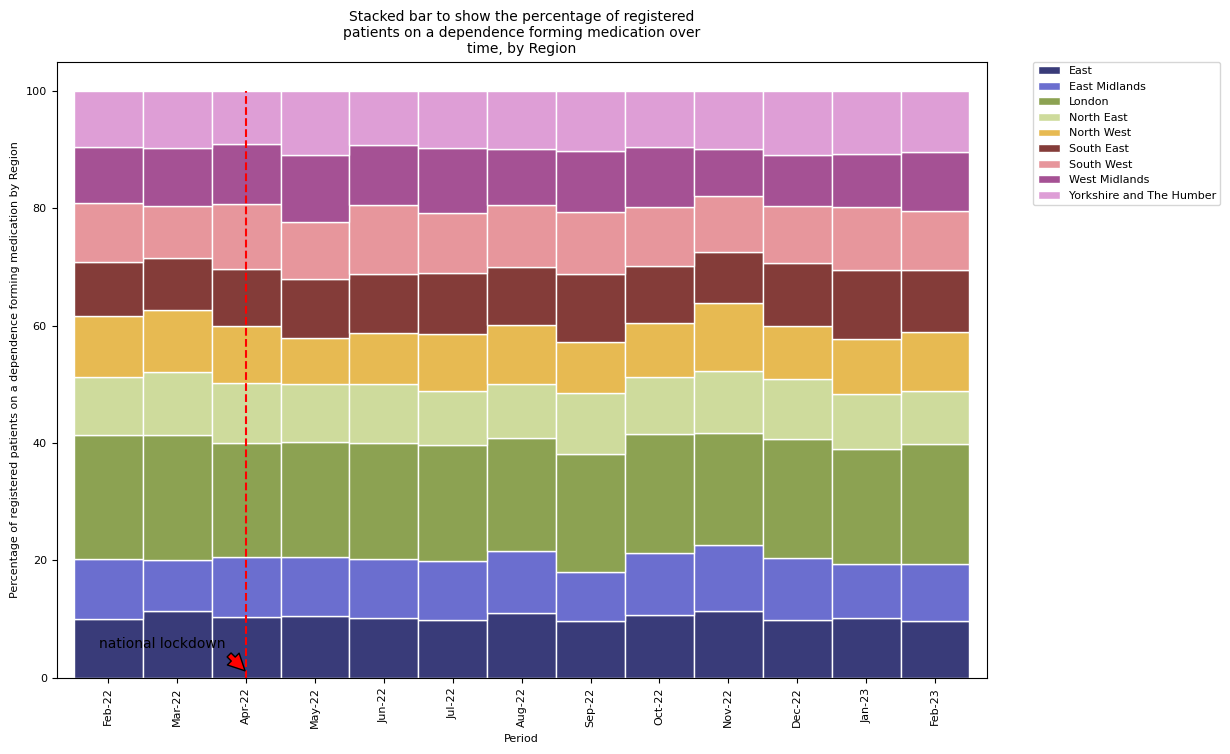

In [242]:
df_region_stacked = pd.DataFrame(df_measure_dfm_medications_region_rate)
df_region_stacked.head()
totrm = df_region_stacked.sum(axis=1)
perrm = df_region_stacked.div(totrm, axis=0).mul(100).round(2)
ax = perrm.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_rate_bar.png", bbox_inches='tight', dpi=100)
plt.show()

In [243]:
print(tabulate(perrm.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrm.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22   10.05            10.15      21.1          9.95          10.4          9.25            10              9.5                         9.6
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-23     9.6              9.7      20.5          9.15            10          10.5         10.15             9.95                       10.45


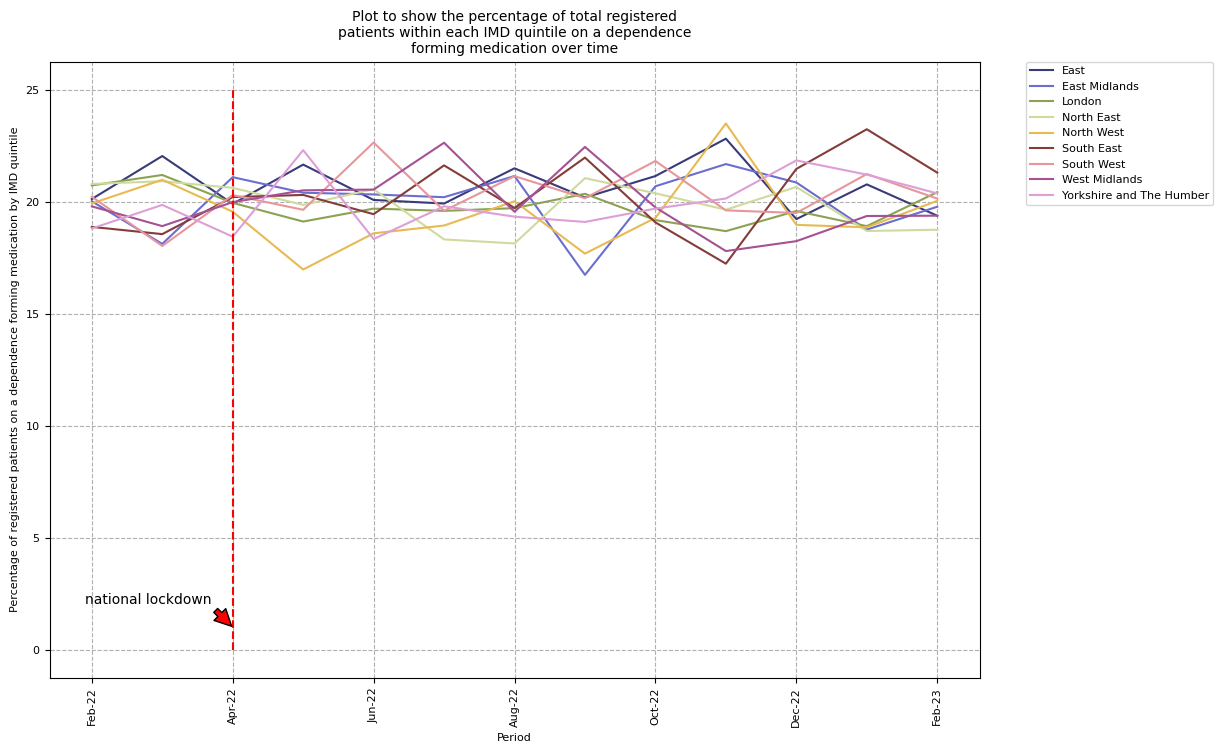

In [244]:
data_measure_dfm_medications_region_rate['value'] = 100 * data_measure_dfm_medications_region_rate['value']
df_measure_region_population_rate = pd.DataFrame.pivot(data_measure_dfm_medications_region_rate, index='date', columns='region', values='value')
df_measure_region_population_rate.index = pd.to_datetime(df_measure_region_population_rate.index).strftime('%b-%y')
ax = df_measure_region_population_rate.plot(fontsize=8, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication by IMD quintile', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=25,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the percentage of total registered patients within each IMD quintile on a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_region_population_rate_plot.png", bbox_inches='tight', dpi=100)
plt.show()

In [245]:
print(tabulate(df_measure_region_population_rate.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_measure_region_population_rate.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22  20.1201          20.0197   20.7269       20.7941       19.9234       18.8776       20.2224          19.7917                     18.8051
date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-23  19.3744          19.7757   20.4285         18.75       20.0401       21.2982       20.1389          19.3768                     20.3704


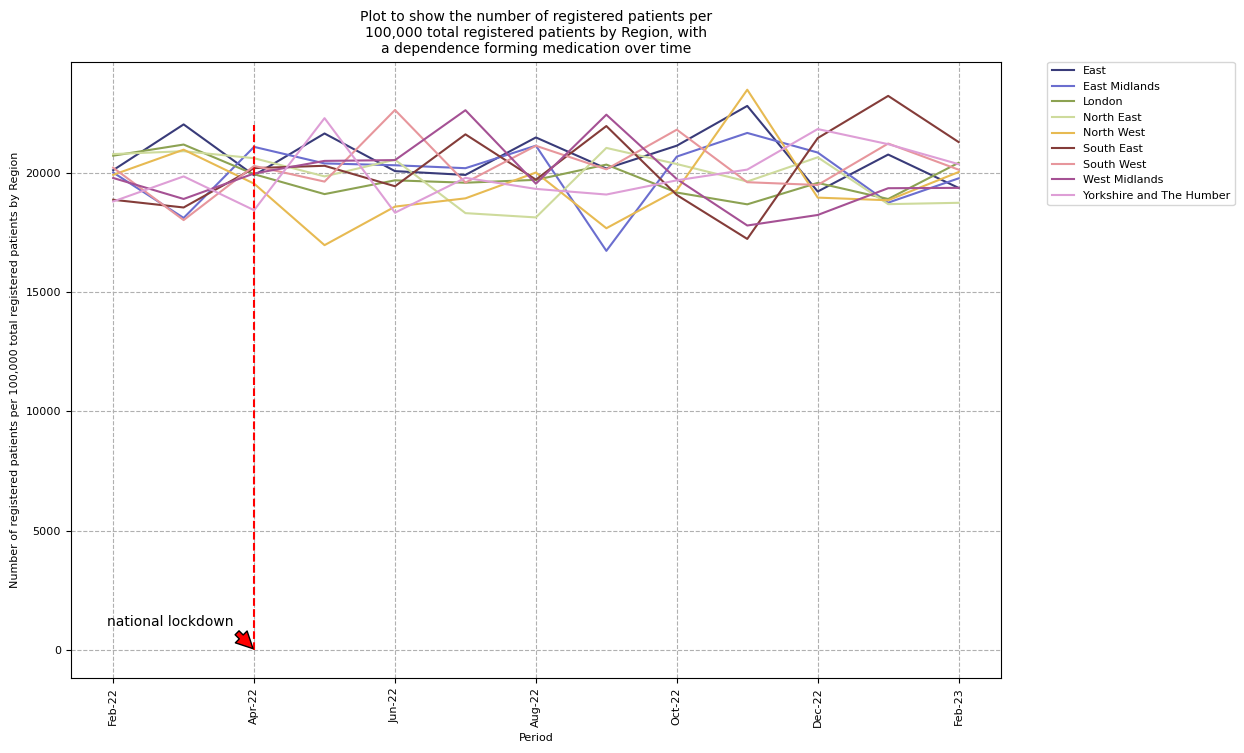

In [246]:
df_temp = pd.DataFrame(data_measure_dfm_medications_region_rate)
df_region_research_population=df_temp.assign(weighted_research_population=lambda x: x.research_population / (x.population / 100000))
df_region_research_population = pd.DataFrame.pivot(df_region_research_population, index='date', columns='region', values='weighted_research_population')
df_region_research_population.index = pd.to_datetime(df_region_research_population.index).strftime('%b-%y')
ax = df_region_research_population.plot(fontsize=8, figsize=(12,8), colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=22000,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with a dependence forming medication over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_dfm_medications_region_weighted_plot.png", bbox_inches='tight', dpi=100)
plt.show()


In [247]:
print(tabulate(df_region_research_population.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df_region_research_population.iloc[-1:], headers='keys', tablefmt = 'simple'))

date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22  20120.1          20019.7   20726.9       20794.1       19923.4       18877.6       20222.4          19791.7                     18805.1
date       East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-23  19374.4          19775.7   20428.5         18750       20040.1       21298.2       20138.9          19376.8                     20370.4


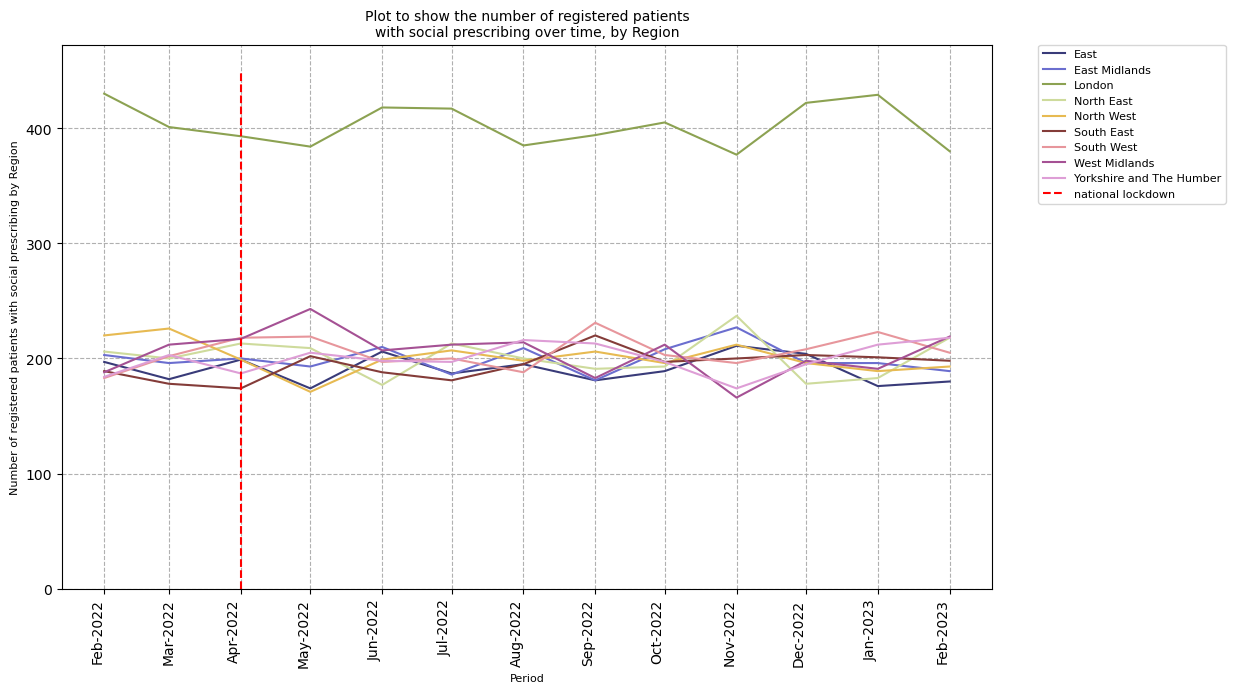

In [248]:
data_measure_social_prescribing_region_rate = pd.read_csv("../output/measure_compare_medications_by_region_socialrx_v_consultation_rate.csv", usecols=["date", "region", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_social_prescribing_region_rate = data_measure_social_prescribing_region_rate.loc[data_measure_social_prescribing_region_rate["region"] != "nan", :]
data_measure_social_prescribing_region_rate = data_measure_social_prescribing_region_rate.loc[data_measure_social_prescribing_region_rate["with_social_prescribing"] == 1, :]
df = pd.DataFrame(data=data_measure_social_prescribing_region_rate)
df2 = df.groupby(['date', 'region']).population.sum().unstack()

N = 9
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients with social prescribing by Region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=450,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients with social prescribing over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_region_rate_plot.png", bbox_inches='tight', dpi=100)
plt.show()

In [249]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00     197              203       430           206           220           189           183              188                         184
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-02-01 00:00:00     180              189       380           218           193           198           205              219                         218


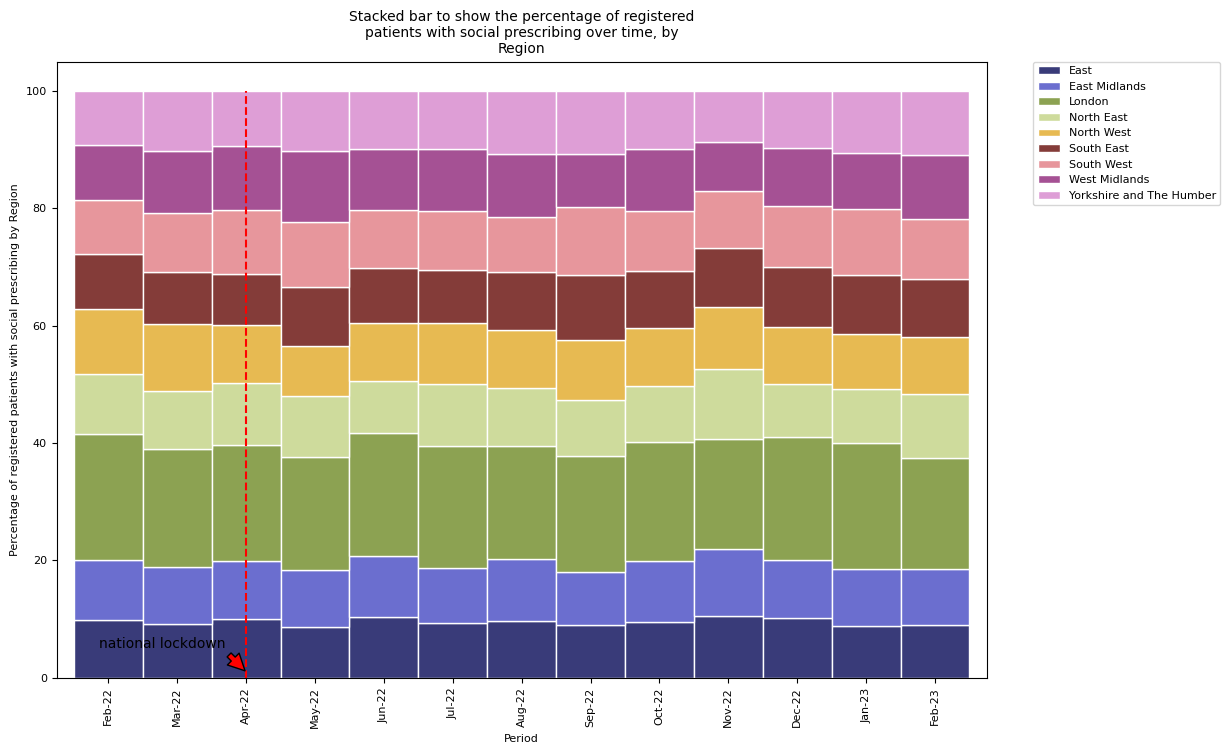

In [250]:
df_region_social_stacked = pd.DataFrame(df2)
df_region_social_stacked.head()
df_region_social_stacked.index = pd.to_datetime(df_region_social_stacked.index).strftime('%b-%y')
totrs = df_region_social_stacked.sum(axis=1)
perrs = df_region_social_stacked.div(totrs, axis=0).mul(100).round(2)
ax = perrs.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients with social prescribing by Region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients with social prescribing over time, by Region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_social_prescribing_region_rate_bar.png", bbox_inches='tight', dpi=100)
plt.show()

In [251]:
print(tabulate(perrs.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrs.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22    9.85            10.15      21.5          10.3            11          9.45          9.15              9.4                         9.2
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-23       9             9.45        19          10.9          9.65           9.9         10.25            10.95                        10.9


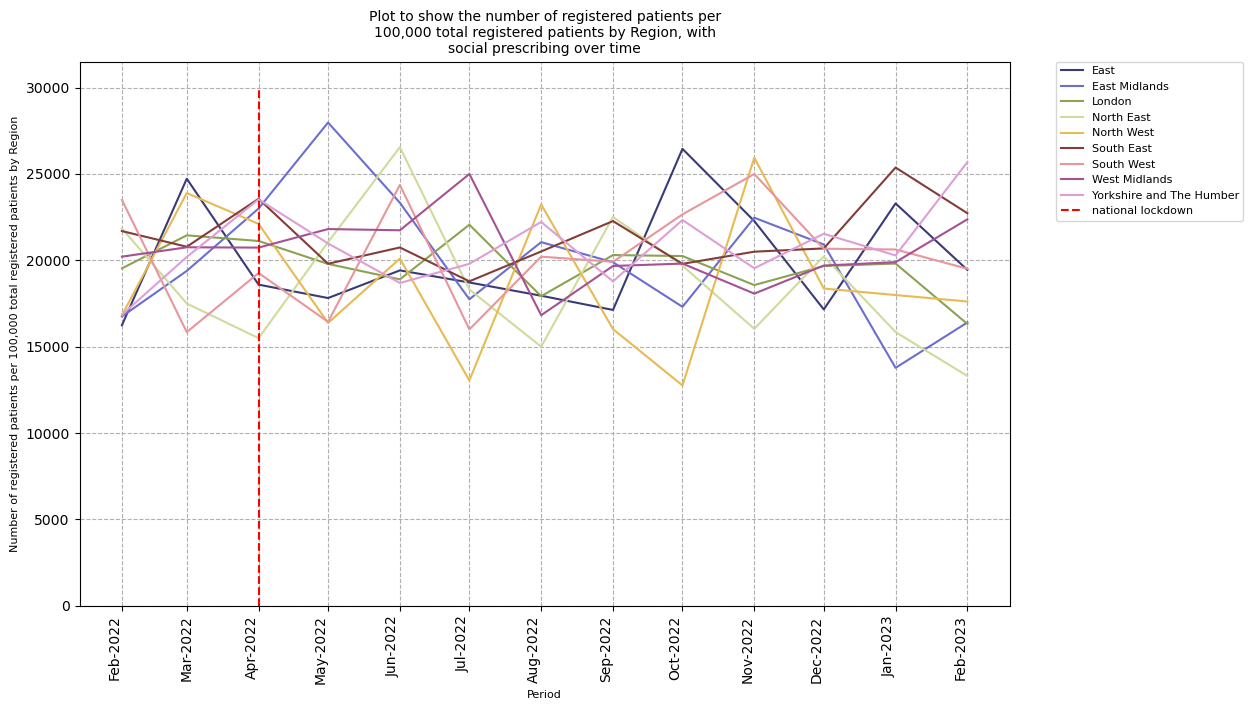

In [252]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'region']).research_population.sum().unstack() / df1.groupby(['date', 'region']).weighted_population.sum().unstack()

N = 9
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients per 100,000 total registered patients by Region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=30000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by Region, with social prescribing over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_social_prescribing_region_weighted_plot.png", bbox_inches='tight', dpi=100)
plt.show()

In [253]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00  16243.7          16748.8   19534.9       21844.7       16818.2       21693.1       23497.3          20212.8                     16847.8
date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-02-01 00:00:00  19444.4          16402.1   16315.8       13302.8       17616.6       22727.3       19512.2          22374.4                     25688.1


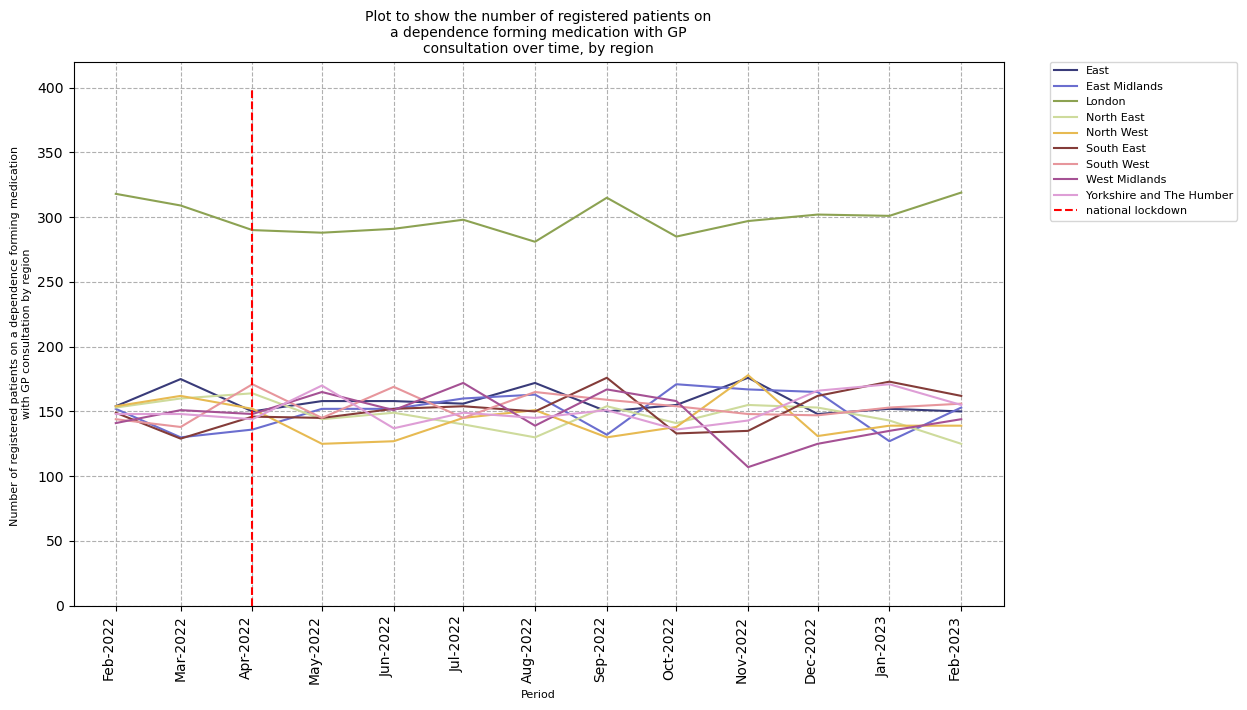

In [254]:
data_measure_consultation_region_rate = pd.read_csv("../output/measure_compare_medications_by_region_socialrx_v_consultation_rate.csv", usecols=["date", "region", "with_medication", "with_social_prescribing", "with_consultation", "population", "research_population"], parse_dates=["date"])
data_measure_consultation_region_rate = data_measure_consultation_region_rate.loc[data_measure_consultation_region_rate["region"] != "nan", :]
data_measure_consultation_region_rate = data_measure_consultation_region_rate.loc[data_measure_consultation_region_rate["with_consultation"] == 1, :]
df = pd.DataFrame(data=data_measure_consultation_region_rate)
df2 = df.groupby(['date', 'region']).research_population.sum().unstack()

N = 9
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nwith GP consultation by region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=400,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients on a dependence forming medication with GP consultation over time, by region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_region_rate_plot.png", bbox_inches='tight', dpi=100)
plt.show()


In [255]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00     154              152       318           153           154           149           144              141                         148
date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-02-01 00:00:00     150              153       319           125           139           162           156              144                         155


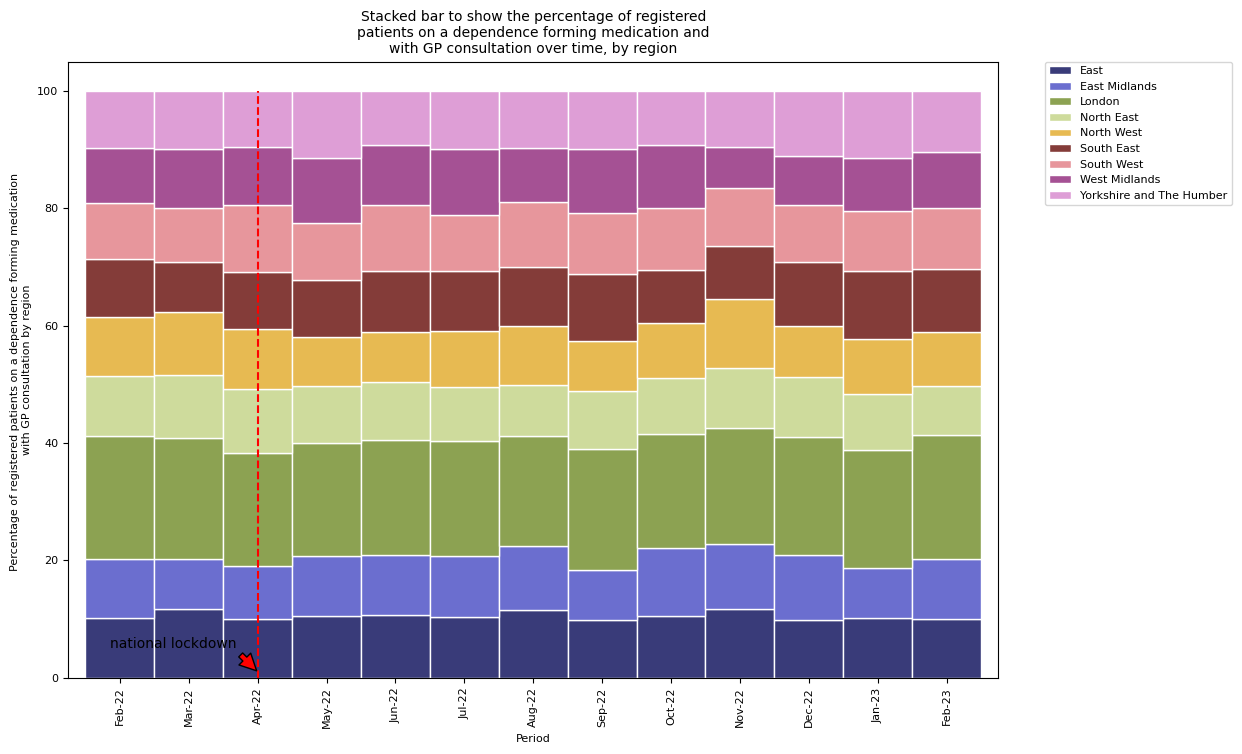

In [256]:
df_region_consult_stacked = pd.DataFrame(df2)
df_region_consult_stacked.head()
df_region_consult_stacked.index = pd.to_datetime(df_region_consult_stacked.index).strftime('%b-%y')
totrc = df_region_consult_stacked.sum(axis=1)
perrc = df_region_consult_stacked.div(totrc, axis=0).mul(100).round(2)
ax = perrc.plot(kind='bar', stacked=True, fontsize=8, edgecolor='white', width=1, figsize=(12,8), rot=0, colormap='tab20b')
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Percentage of registered patients on a dependence forming medication \nwith GP consultation by region', fontsize=8)
ax.vlines(
        x=2,
        ymin=0,
        ymax=100,
        colors="red",
        ls="--",
    )
ax.annotate('national lockdown',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
title = 'Stacked bar to show the percentage of registered patients on a dependence forming medication and with GP consultation over time, by region'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.xticks(rotation=90)
plt.savefig(f"../output/measure_gp_consultation_region_rate_bar.png", bbox_inches='tight', dpi=100)
plt.show()

In [257]:
print(tabulate(perrc.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(perrc.iloc[-1:], headers='keys', tablefmt = 'simple'))

date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-22   10.18            10.05     21.02         10.11         10.18          9.85          9.52             9.32                        9.78
date      East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
Feb-23    9.98            10.18     21.22          8.32          9.25         10.78         10.38             9.58                       10.31


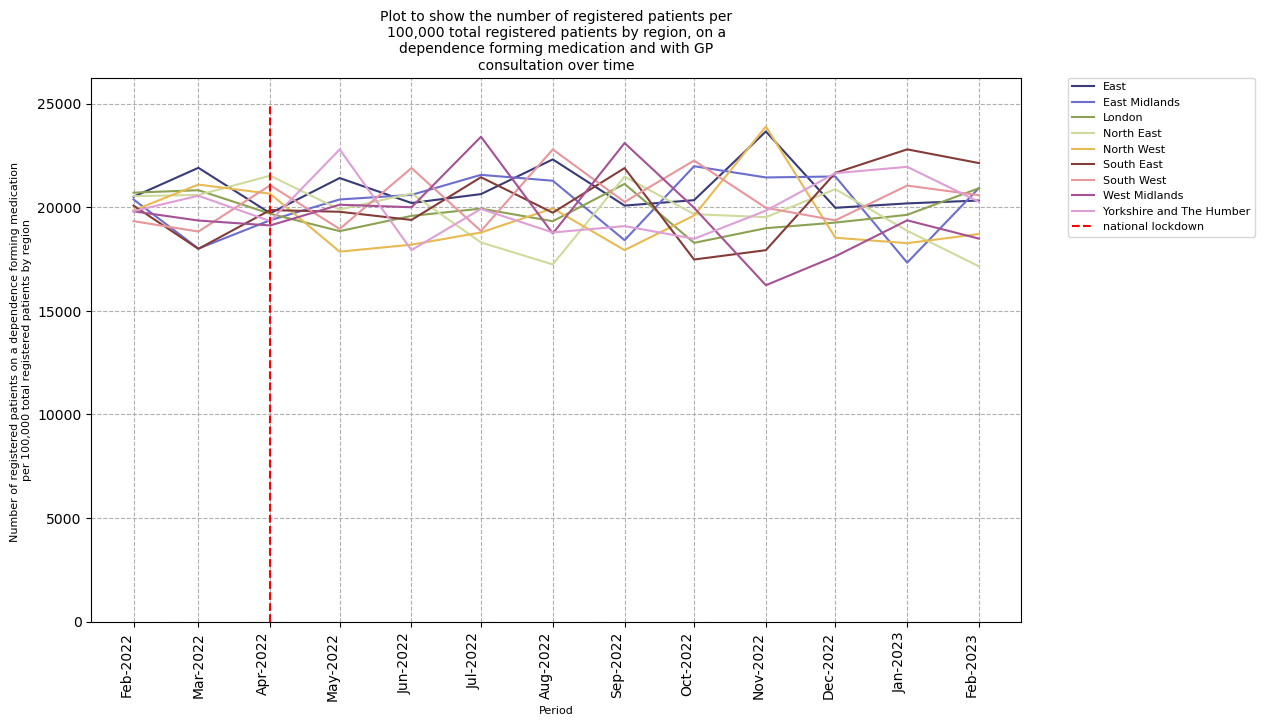

In [258]:
df1 = df.assign(weighted_population=lambda x: x.population / 100000)
df2 = df1.groupby(['date', 'region']).research_population.sum().unstack() / df1.groupby(['date', 'region']).weighted_population.sum().unstack()

N = 9
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20b(np.linspace(0,1,N)))

fig = plt.figure(figsize=(12,8))
ax = plt.subplot()

months = mdates.MonthLocator()
date_format = mdates.DateFormatter('%b-%Y')

ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(months)
fig.autofmt_xdate()
ax.plot(df2)
ax.set_xlabel('Period', fontsize=8)
ax.set_ylabel('Number of registered patients on a dependence forming medication \nper 100,000 total registered patients by region', fontsize=8)
plt.vlines(
        x=[pd.to_datetime(covid)],
        ymin=0,
        ymax=25000,
        colors="red",
        ls="--",
        label="national lockdown",
    )
plt.ylim(ymin=0)
plt.xticks(rotation=90)
title = 'Plot to show the number of registered patients per 100,000 total registered patients by region, on a dependence forming medication and with GP consultation over time'
plt.title('\n'.join(wrap(title,50)), fontsize=10)
plt.legend(labels= ["East", "East Midlands", "London", "North East", "North West", "South East", "South West", "West Midlands", "Yorkshire and The Humber", "national lockdown"], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
plt.grid(linestyle="dashed")
plt.savefig(f"../output/measure_gp_consultation_region_weighted_plot.png", bbox_inches='tight', dpi=100)
plt.show()

In [259]:
print(tabulate(df2.iloc[:1], headers='keys', tablefmt = 'simple'))
print(tabulate(df2.iloc[-1:], headers='keys', tablefmt = 'simple'))

date                   East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  ------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2022-02-01 00:00:00   20506          20375.3   20703.1       20536.9       19845.4       20080.9       19328.9          19803.4                     19812.6
date                    East    East Midlands    London    North East    North West    South East    South West    West Midlands    Yorkshire and The Humber
-------------------  -------  ---------------  --------  ------------  ------------  ------------  ------------  ---------------  --------------------------
2023-02-01 00:00:00  20325.2          20930.2     20918       17146.8       18707.9       22131.1       20580.5          18485.2                     20261.4
